In [1]:
import sys  
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('dataset/train/train.csv')
test = pd.read_csv('dataset/test/test_data.csv')

In [3]:
print(train.shape)
print(test.shape)

(32470, 6)
(7765, 6)


In [4]:
train.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [5]:
test.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree


In [6]:
print(train.iloc[0]['sentence'])
print(train.iloc[0]['subject_entity'])
print(train.iloc[0]['object_entity'])
print(train.iloc[0]['label'])

〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.
{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}
no_relation


In [7]:
train['label'].value_counts()

no_relation                            9534
org:top_members/employees              4284
per:employee_of                        3573
per:title                              2103
org:member_of                          1866
org:alternate_names                    1320
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                    1001
per:spouse                              795
per:colleagues                          534
per:parents                             520
org:founded                             450
org:members                             420
per:date_of_death                       418
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

In [11]:
train['source'].value_counts()

wikipedia          21620
wikitree           10672
policy_briefing      178
Name: source, dtype: int64

In [8]:
train['sentence_length'] = [len(x) for x in train['sentence']]
test['sentence_length'] = [len(x) for x in test['sentence']]

In [25]:
import numpy as np

train_sentlength = np.array(list(map(len, train['sentence'])))
test_sentlength = np.array(list(map(len, test['sentence'])))
print('train length: ', len(train))
print('train sentence length min: ', min(train_sentlength))
print('train sentence length max: ', max(train_sentlength))
print('train sentence length mean: ', np.mean(train_sentlength))
print('train sentence length median: ', np.median(train_sentlength))

print('\ntest length: ', len(test))
print('train sentence length min: ', min(train_sentlength))
print('train sentence length max: ', max(test_sentlength))
print('train sentence length mean: ', np.mean(test_sentlength))
print('train sentence length median: ', np.median(test_sentlength))

train length:  32470
train sentence length min:  14
train sentence length max:  455
train sentence length mean:  97.08395441946412
train sentence length median:  87.0

test length:  7765
train sentence length min:  14
train sentence length max:  432
train sentence length mean:  92.96497102382486
train sentence length median:  85.0


<AxesSubplot:xlabel='sentence_length', ylabel='Count'>

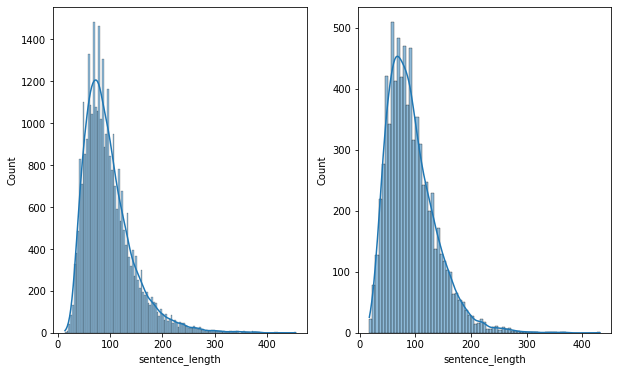

In [9]:
fig = plt.figure(figsize = (10,6))

fig.add_subplot(121)
sns.histplot(train['sentence_length'], kde=True)

fig.add_subplot(122)
sns.histplot(test['sentence_length'], kde=True)

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


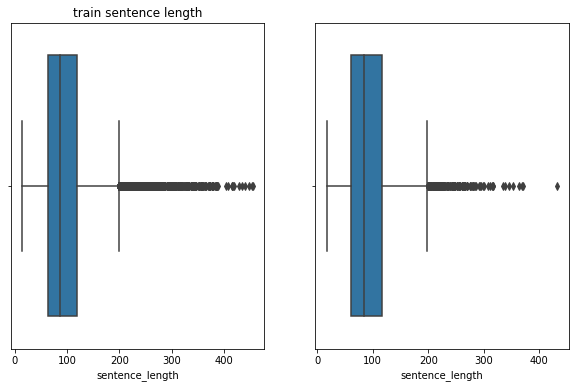

In [10]:
fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(121)
sns.boxplot(train['sentence_length'])
ax1.set_title('train sentence length')

ax2 = fig.add_subplot(122)
sns.boxplot(test['sentence_length'])
plt.show()

In [45]:
train.head()

,id,sentence,subject_entity,object_entity,label,source,sentence_length,subject,object
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,59,비틀즈,조지 해리슨
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,54,민주평화당,대안신당
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,99,광주FC,한국프로축구연맹
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,78,아성다이소,박정부
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,56,요미우리 자이언츠,1967


In [26]:
print(type(train['subject_entity'].iloc[0]))

<class 'str'>


In [44]:
def get_word(string):
    return string[1:-1].split(',')[0].split(':')[1].strip()[1:-1]

train['subject'] = list(map(get_word, train['subject_entity']))
train['object'] = list(map(get_word, train['object_entity']))
test['subject'] = list(map(get_word, test['subject_entity']))
test['object'] = list(map(get_word, test['object_entity']))

In [48]:
train_data = train[['id', 'sentence', 'subject', 'object', 'label']]
test_data = test[['id', 'sentence', 'subject', 'object', 'label']]

In [32]:
train_data.to_csv('train_p.csv')
test_data.to_csv('test_p.csv')

In [51]:
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification, Trainer, TrainingArguments, RobertaConfig, RobertaTokenizer, RobertaForSequenceClassification, BertTokenizer

model_name = 'klue/bert-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_data['sent_tokens'] = list(map(tokenizer.encode, train_data['sentence']))
test_data['sent_tokens'] = list(map(tokenizer.encode, test_data['sentence']))

<ipython-input-51-9f8e18dde510>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sent_tokens'] = list(map(tokenizer.encode, train_data['sentence']))
<ipython-input-51-9f8e18dde510>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['sent_tokens'] = list(map(tokenizer.encode, test_data['sentence']))


In [49]:
def entity(s, o):
    return s + '[SEP]' + o

temp = [entity(s,o) for s, o in zip(train_data['subject'], train_data['object'])]
train_data['entity_tokens'] = list(map(tokenizer.encode, temp))

<ipython-input-49-6fd876d9f914>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['entity_tokens'] = list(map(tokenizer.encode, temp))


In [52]:
temp = [entity(s,o) for s, o in zip(test_data['subject'], test_data['object'])]
test_data['entity_tokens'] = list(map(tokenizer.encode, temp))

<ipython-input-52-a8aa3f33d64b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['entity_tokens'] = list(map(tokenizer.encode, temp))


In [54]:
train_data

,id,sentence,subject,object,label,entity_tokens,sent_tokens
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨,no_relation,"[2, 29830, 3, 8373, 14113, 2234, 3]","[2, 168, 30985, 14451, 7088, 4586, 169, 793, 8..."
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당,no_relation,"[2, 3772, 2139, 2267, 2481, 3, 5605, 2250, 248...","[2, 6409, 2052, 4568, 2179, 6417, 2044, 2315, ..."
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹,org:member_of,"[2, 4104, 10904, 3, 3629, 17287, 20212, 3]","[2, 47, 17665, 2302, 27135, 4610, 21, 2090, 21..."
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부,org:top_members/employees,"[2, 27930, 24393, 2024, 3, 6580, 2144, 3]","[2, 23306, 2116, 3799, 18319, 2532, 12, 1564, ..."
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967,no_relation,"[2, 20289, 20562, 3, 14925, 3]","[2, 14925, 2440, 3701, 4878, 19038, 21, 22247,..."
...,...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,유기준,부산 서구·동구,per:employee_of,"[2, 5967, 2456, 3, 3902, 5905, 100, 7522, 3]","[2, 3629, 2481, 2073, 27, 2210, 4400, 29, 2067..."
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...",최시형,손병희,per:colleagues,"[2, 28246, 2444, 3, 1284, 2394, 2364, 3]","[2, 1144, 2208, 2259, 3690, 28246, 2444, 16, 2..."
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,완도군,신우철,org:top_members/employees,"[2, 18272, 2242, 3, 31102, 2313, 3]","[2, 18272, 2242, 12, 6942, 31102, 2313, 13, 15..."
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...",JTBC,중앙홀딩스,no_relation,"[2, 15710, 3, 4097, 2827, 2500, 2255, 3]","[2, 15724, 16, 15710, 3873, 2069, 8490, 3719, ..."


In [53]:
test_data

,id,sentence,subject,object,label,sent_tokens,entity_tokens
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,MBC,탐사기획 스트레이트,100,"[2, 3625, 3749, 2210, 5633, 11, 11428, 26648, ...","[2, 5633, 3, 11428, 26648, 27967, 3]"
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,프린세스 프링,공주,100,"[2, 3784, 21154, 114, 8354, 24141, 1878, 2557,...","[2, 8354, 24141, 1878, 2557, 3, 6717, 3]"
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...",경찰,1995년,100,"[2, 3995, 16, 5006, 12, 16576, 2283, 13, 1498,...","[2, 3858, 3, 7394, 2440, 3]"
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,세조,정창손,100,"[2, 1543, 2335, 2390, 2073, 648, 2431, 2145, 3...","[2, 21396, 3, 1543, 2335, 2390, 3]"
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...",민주당,권영진,100,"[2, 3817, 4186, 11474, 2580, 25312, 2252, 2073...","[2, 4186, 3, 28845, 3]"
...,...,...,...,...,...,...,...
7760,7760,코로나19 방역 조치의 일환으로 국민의 움직임을 통제하려는 정부의 시도를 이탈리아 ...,정부,이탈리아,100,"[2, 1726, 11235, 22328, 12133, 4524, 2079, 859...","[2, 3659, 3, 6079, 3]"
7761,7761,선 연구원은 “위식도역류질환치료제인 케이캡이 92억원 판매되면서 2019년 연간 3...,종근당,전년,100,"[2, 1261, 4736, 2073, 116, 1485, 2096, 2119, 2...","[2, 1558, 2169, 2481, 3, 5301, 3]"
7762,7762,"한국전기안전공사(사장 조성완)는 8월 1일부로, 3급 간부직원에 대한 승진·이동 인...",한국전기안전공사,조성완,100,"[2, 3629, 16074, 14736, 5634, 12, 4184, 4196, ...","[2, 3629, 16074, 14736, 5634, 3, 4196, 2365, 3]"
7763,7763,1987년 B. 슈나이더(B. Schneider)에 의해 만들어졌다.,B. 슈나이더,1987년,100,"[2, 9175, 2440, 38, 18, 1312, 7461, 2320, 12, ...","[2, 38, 18, 1312, 7461, 2320, 3, 9175, 2440, 3]"


In [58]:
train_data['sent_token_length'] = list(map(len, train_data['sent_tokens']))
test_data['sent_token_length'] = list(map(len, test_data['sent_tokens']))

train_data['ent_token_length'] = list(map(len, train_data['entity_tokens']))
test_data['ent_token_length'] = list(map(len, test_data['entity_tokens']))

<ipython-input-58-a1d3099e4257>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sent_token_length'] = list(map(len, train_data['sent_tokens']))
<ipython-input-58-a1d3099e4257>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['sent_token_length'] = list(map(len, test_data['sent_tokens']))


In [62]:
total_tokens = []
for li in list(train_data['sent_tokens']):
    total_tokens.extend(li)
print(len(set(total_tokens)))

24480


In [65]:
print('train 문장 token 개수 평균: ', np.mean(np.array(list(train_data['sent_token_length']))))
print('train 문장 token 개수 중앙값: ', np.median(np.array(list(train_data['sent_token_length']))))
print('train 문장 token 개수 최소: ', np.min(np.array(list(train_data['sent_token_length']))))
print('train 문장 token 개수 최대: ', np.max(np.array(list(train_data['sent_token_length']))))
print('train entity token 개수 평균: ', np.mean(np.array(list(train_data['ent_token_length']))))
print('train entity token 개수 중앙값: ', np.median(np.array(list(train_data['ent_token_length']))))

print('\ntest 문장 token 개수 평균: ', np.mean(np.array(list(test_data['sent_token_length']))))
print('test 문장 token 개수 중앙값: ', np.median(np.array(list(test_data['sent_token_length']))))
print('test 문장 token 개수 최소: ', np.min(np.array(list(test_data['sent_token_length']))))
print('test 문장 token 개수 최대: ', np.max(np.array(list(test_data['sent_token_length']))))
print('test entity token 개수 평균: ', np.mean(np.array(list(test_data['ent_token_length']))))
print('test entity token 개수 중앙값: ', np.median(np.array(list(test_data['ent_token_length']))))

train 문장 token 개수 평균:  52.95860794579612
train 문장 token 개수 중앙값:  48.0
train 문장 token 개수 최소:  9
train 문장 token 개수 최대:  231
train entity token 개수 평균:  8.59621188789652
train entity token 개수 중앙값:  8.0

test 문장 token 개수 평균:  51.2
test 문장 token 개수 중앙값:  47.0
test 문장 token 개수 최소:  12
test 문장 token 개수 최대:  223
test entity token 개수 평균:  7.27533805537669
test entity token 개수 중앙값:  7.0


In [70]:
from collections import Counter
counter = Counter(total_tokens)
top10 = counter.most_common(n=10)
top10_indices = [x[0] for x in top10]

In [71]:
tokenizer.convert_ids_to_tokens(top10_indices)

[',', '.', '##의', '[CLS]', '[SEP]', '##다', '##을', '##에', '##는', '##년']

In [74]:
tokenizer('이순신은 조선 중기의 무신이다.', padding=True, truncation=True, max_length = 3)

{'input_ids': [2, 10661, 3], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}